# Module 3 - Programming Assignment

## Directions

There are general instructions on Blackboard and in the Syllabus for Programming Assignments. This Notebook also has instructions specific to this assignment. Read all the instructions carefully and make sure you understand them. Please ask questions on the discussion boards or email me at `EN605.445@gmail.com` if you do not understand something.

<div style="background: mistyrose; color: firebrick; border: 2px solid darkred; padding: 5px; margin: 10px;">
You must follow the directions *exactly* or you will get a 0 on the assignment.
</div>

You must submit a zip file of your assignment and associated files (if there are any) to Blackboard. The zip file will be named after you JHED ID: `<jhed_id>.zip`. It will not include any other information. Inside this zip file should be the following directory structure:

```
<jhed_id>
    |
    +--module-03-programming.ipynb
    +--module-03-programming.html
    +--(any other files)
```

For example, do not name  your directory `programming_assignment_01` and do not name your directory `smith122_pr1` or any else. It must be only your JHED ID.

Add whatever additional imports you require here. Stick with the standard libraries and those required by the class. The import
gives you access to these functions: http://ipython.org/ipython-doc/stable/api/generated/IPython.core.display.html (Copy this link)
Which, among other things, will permit you to display HTML as the result of evaluated code (see HTML() or display_html()).

**For this assignment, you will need to have networkx installed. Follow the directions using your particular installation: pip or conda** (if you installed the Anaconda package, it will already be installed).

In [33]:
%matplotlib inline

from __future__ import division

import matplotlib.pyplot as plt
import networkx as nx
import sys
import copy

## CSP: Map Coloring

In this programming assignment, you will be using your new understanding of **Constraint Satisfaction Problems** to color maps. As we know from the [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem) any division of a plane into contiguous regions can be colored such that no two adjacent regions are the same color by using only four colors.

From the book, we know that we can translate this problem into a CSP where the map is represented as a [planar graph](http://en.wikipedia.org/wiki/Planar_graph) and the goal is to color all the nodes such that no adjacent nodes are colored the same color.

As with most AI problems, this requires us to figure out how best to represent the problem--and the solution--given the high and low level data structures and types at our disposal. For this problem, we'll settle on a Dict which contains at least two keys: "nodes" which is an *ordered* List of Strings that represents each node or vertex in the planar graph and "edges" which contains a List of Tuples that represent edges between nodes. The Tuples are of ints that represent the index of the node in the "nodes" list.

Using this system, and adding a "coordinates" key with abstract drawing coordinates of each node for NetworkX, we can represent the counties of Connecticut like so:

In [34]:
connecticut = { "nodes": ["Fairfield", "Litchfield", "New Haven", "Hartford", "Middlesex", "Tolland", "New London", "Windham"],
                "edges": [(0,1), (0,2), (1,2), (1,3), (2,3), (2,4), (3,4), (3,5), (3,6), (4,6), (5,6), (5,7), (6,7)],
                "coordinates": [( 46, 52), ( 65,142), (104, 77), (123,142), (147, 85), (162,140), (197, 94), (217,146)]}

print(connecticut)

{'edges': [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7)], 'nodes': ['Fairfield', 'Litchfield', 'New Haven', 'Hartford', 'Middlesex', 'Tolland', 'New London', 'Windham'], 'coordinates': [(46, 52), (65, 142), (104, 77), (123, 142), (147, 85), (162, 140), (197, 94), (217, 146)]}


The coordinates permit us to use NetworkX to draw the graph. We'll add a helper function for this, `draw_map`, which takes our planar_map, a figure size in abstract units, and a List of color assignments in the same order as the nodes in the planar_map.  The underlying drawings are made by matplotlib using NetworkX on top of it. Incidentally, the positions just make the map "work out" on NetworkX/matplotlib.

The size parameter is actually inches wide by inches tall (8, 10) is an 8x10 sheet of paper. Why doesn't a chart cover up the whole screen then? It's adjusted by dpi. On high resolution monitors, 300 dpi with 8x10 inches might only take up a fraction of that space. Use whatever you want to make the output look good. It doesn't matter for anything else but that.

A default value for `color_assignments` is provided, `None`, that simply colors all the nodes red. Otherwise, `color_assignments` must be a `List of Tuples` where each `Tuple` is a node name and assigned color. The order of `color_assignments` must be the same as the order of `"nodes"` in the `planar_map`.

In [35]:
def draw_map(planar_map, size, color_assignments=None):
    def as_dictionary(a_list):
        dct = {}
        for i, e in enumerate(a_list):
            dct[i] = e
        return dct
    
    G = nx.Graph()
    
    labels = as_dictionary(planar_map[ "nodes"])
    pos = as_dictionary(planar_map["coordinates"])
    
    # create a List of Nodes as indices to match the "edges" entry.
    nodes = [n for n in range(0, len(planar_map[ "nodes"]))]

    if color_assignments:
        colors = [c for n, c in color_assignments]
    else:
        colors = ['red' for c in range(0,len(planar_map[ "nodes"]))]

    G.add_nodes_from( nodes)
    G.add_edges_from( planar_map[ "edges"])

    plt.figure( figsize=size, dpi=600)

    nx.draw( G, node_color = colors, with_labels = True, labels = labels, pos = pos)

Using this function, we can draw `connecticut`:

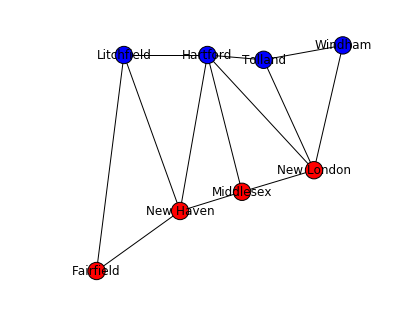

In [36]:
draw_map( connecticut, (5,4), [("Fairfield", "red"), ("Litchfield", "blue"), 
                               ("New Haven", "red"), ("Hartford", "blue"),
                               ("Middlesex", "red"), ("Tolland", "blue"),
                               ("New London", "red"), ("Windham", "blue")])

This coloring obviously has some problems! You're going to write a program to fix it.

So what we (and by "we", I mean "you") would like to do is write a program that can figure out how to color a planar map...ie, `connecticut` *and* `europe`, you will do it by implementing a function that uses the algorithms that were discussed in this module.

## Which CSP Algorithms?

You will need to implement **backtracking** and **forward checking**.  You will also need to implement **Minimum Remaining Values** or **Degree Heuristic** (tell me which one) and **Least Constraining Value**. Break ties in ascending order (least to most).

I suggest you implement backtracking then forward checking then either minimum remaining values or degree heuristic then least constraining value. Try to submit a working program (if you don't make it to some requirement, comment out that code).

Please change the "?" below into "yes" or "no" indicating which elements you were able to implement:

    backtracking: ?
    forward checking: ?
    minimum remaining values: ?
    degree heuristic: ?
    least contraining value: ?

Your function should take the following form:

```python
def color_map( planar_map, colors, trace=False)
```

where `planar_map` has the format described above, colors is a List of Strings denoting the colors to use and `trace` operates as described in the next paragraph. It should return a List of Tuples where each Tuple is of the form `( Node Name, Color)` in the same order as the `node` entry in the planar_map. For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, your function might return `[("A", "Yellow"), ("B", "Green")]`. You can then use a List comprehension to extract the colors in order to feed them to `draw_map`. If a coloring cannot be found, return `None`.

Your function also will take an optional argument, `trace`, with a default value of `False`. 

If `trace` is set to `True` your program will print out *traces* (or debugging) statements that show what it is currently doing (in terms of the algorithms you are supposed to implement). For example, if your program starts to backtrack, the trace should say that it has to backtrack and why.

As usual, you should implement your function using helper functions, using one Markdown cell for documentation and one Codecell for implementation (one function and assertions).

-----

**helper1**

Documentation

In [73]:
colors = ["red", "blue", "green", "yellow"]

# find nodes that connect to a specific node
def connectsTo(mp, n):
    return [x for (x,y) in mp['edges'] if y==n] + [y for (x,y) in mp['edges'] if x==n]

def getCityNames(mp, l):
    return [mp['nodes'][x] for x in l]

# return the index of the unassigned node with minimum degree
def maxDegreeNode(degrees, assign):
    un = [not any([y==1 for y in x]) for x in assign]
    tmp = [degrees[n] if x else -sys.maxsize for n,x in enumerate(un)]
    return tmp.index( max(tmp) )

# return the index of the unassigned node with minimum degree
def maxDegreeOfNodes(degrees, assign, inds):
    if len(inds) == 1:
        return ind[0]
    else:
        un = [not any([y==1 for y in x]) for x in assign]
        tmp = [degrees[x] for x in inds if un[x]]
        return inds[ tmp.index(max(tmp)) ]

# return index of unassigned node with min remaining values
def minRemValueNodes(assign):
    un = [not any([y==1 for y in x]) for x in assign]
    tmp = [sum([y==0 for y in assign[n]]) if x \
         else -sys.maxsize for n,x in enumerate(un)]
    minVal = min(tmp)
    return [n for n,x in enumerate(tmp) if x == minVal]

def leastConstraining(assign, dests, node):
    vals = [n for n,x in enumerate(assign[node]) if x==0]
    [assign[x] for x in dest]

def assignComplete(assign):
    return all([any([y==1 for y in x]) for x in assign])

def assignFail(assign):
    return any([all([y==-1 for y in x]) for x in assign])

def checkForward(inAssign, dests, val):
    assign = copy.deepcopy(inAssign)
    for d in dests:
        if not any([x==1 for x in assign[d]]):
            assign[d][val] = -1
    if assignFail(assign):
        return None
    else:
        return assign

def constrainedBy(assign, dests, val):
    for d in dests:
        try:
            color = assign[d].index(1)
            if color == val:
                return True
        except ValueError:
            pass
    return False


In [58]:
a = [[0, -1, 0, -1], [0, -1, 0, 0], [-1, -1, 0, 1], [-1, -1, 0, 0], [-1, 0, 0, -1]]
print( str(minRemValueNodes(a)) + '\n' )

deg = [2, 3, 3, 2, 5]
b = [[0, -1, 0, -1], [0, -1, 0, 0], [-1, -1, 0, 1], [-1, -1, 0, 0], [-1, 0, 0, 1]]
print(maxDegreeNode(deg, b))


[0, 3, 4]

1



-----

In [59]:
def color_map( mp, colors, trace=False):
    # get and store destinations of each node and degrees of each node
    mp['dests'] = [connectsTo(mp,n) for n,x in enumerate(mp['nodes'])] 
    mp['degrees'] = [len(x) for x in mp['dests']] #
    mp['colors'] = colors
    if trace:
        print('CSP starting point looks like: ')
        print(str(mp))

    assign = [[0]*len(colors) for c in mp['nodes']] # color assignments
    out =  backtrack(assign, mp, trace)

    if out is not None:
        tmp = [(mp['nodes'][n],colors[x.index(1)]) for n,x in enumerate(out)]
        if trace:
            print('\nSolution color mapping is: ' + str(tmp))
        return tmp
    else:
        if trace:
            print('Cannot find solution.')
        return out

def backtrack(assign, mp, trace):
    #print('# assigned: ' + str(sum([any([y==1 for y in x]) for x in assign])))
    if trace:
        print('\nStarting new recursion...')
    if assignComplete(assign):
        if trace:
            print('Assignment complete. Returning...')
        return assign
    nd = maxDegreeNode(mp['degrees'], assign) # select node of fewest degrees
    # nd = minRemValueNode(assign) # selected node by fewest rem. values
    if trace:
        print('Selected node ' + str(nd) + ' which has largest degree.')
    dests = mp['dests'][nd] # other nodes the selected node connects to
    if trace:
        print('Node ' + str(nd) + ' connects to: ' + str(dests))
        print('Enumerate: ' + str([n for n,x in enumerate(assign[nd]) if x==0]))

    for c in [n for n,x in enumerate(assign[nd]) if x==0]: # all poss. colors
        tmp = copy.deepcopy(assign) # temp. copy of color assignments
        if trace:
            print('Trying color #' + str(c) + ', ' + str(mp['colors'][c]))

        if not constrainedBy(tmp, dests, c):
            if trace:
                print('Not constrained, adding to assignment')
            tmp[nd][c] = 1 # add current value to assignment
            infer = checkForward(tmp, dests, c)
            if infer is not None:
                if trace:
                    print('Forward checking is fine. New assignment:')
                    print(infer)
                res = backtrack(infer, mp, trace)
                if res is not None:
                    return res
            else:
                if trace:
                    print('Forward checking failed, backtracking...')
        else:
            if trace:
                print('Contrained, trying another color.')

        assign[nd][c] = -1 # does not fit within constraint, set to off
    return None

## Problem 1. Color Connecticut Using Your Solution

In [60]:
connecticut_colors = color_map( connecticut, ["red", "blue", "green", "yellow"], trace=True)

CSP starting point looks like: 
{'nodes': ['Fairfield', 'Litchfield', 'New Haven', 'Hartford', 'Middlesex', 'Tolland', 'New London', 'Windham'], 'coordinates': [(46, 52), (65, 142), (104, 77), (123, 142), (147, 85), (162, 140), (197, 94), (217, 146)], 'dests': [[1, 2], [0, 2, 3], [0, 1, 3, 4], [1, 2, 4, 5, 6], [2, 3, 6], [3, 6, 7], [3, 4, 5, 7], [5, 6]], 'edges': [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7)], 'colors': ['red', 'blue', 'green', 'yellow'], 'degrees': [2, 3, 4, 5, 3, 3, 4, 2]}

Starting new recursion...
Selected node 3 which has largest degree.
Node 3 connects to: [1, 2, 4, 5, 6]
Enumerate: [0, 1, 2, 3]
Trying color #0, red
Not constrained, adding to assignment
Forward checking is fine. New assignment:
[[0, 0, 0, 0], [-1, 0, 0, 0], [-1, 0, 0, 0], [1, 0, 0, 0], [-1, 0, 0, 0], [-1, 0, 0, 0], [-1, 0, 0, 0], [0, 0, 0, 0]]

Starting new recursion...
Selected node 2 which has largest degree.
Node 2 connects to: [0, 1, 3

Using the "edges" list from the connecticut map, we can test to see if each pair of adjacent nodes is indeed colored differently:

In [61]:
edges = connecticut["edges"]
nodes = connecticut[ "nodes"]
colors = connecticut_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[ start][COLOR] != colors[ end][COLOR]
    except AssertionError:
        print("%s and %s are adjacent but have the same color." % (nodes[ start], nodes[ end]))

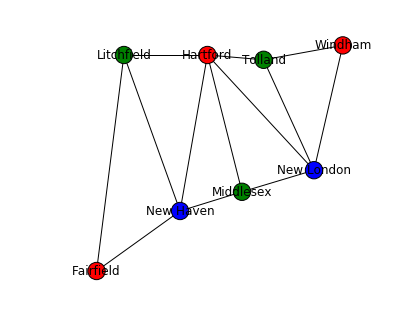

In [62]:
draw_map( connecticut, (5,4), connecticut_colors)

CSP starting point looks like: 
{'nodes': ['Fairfield', 'Litchfield', 'New Haven', 'Hartford', 'Middlesex', 'Tolland', 'New London', 'Windham'], 'coordinates': [(46, 52), (65, 142), (104, 77), (123, 142), (147, 85), (162, 140), (197, 94), (217, 146)], 'dests': [[1, 2], [0, 2, 3], [0, 1, 3, 4], [1, 2, 4, 5, 6], [2, 3, 6], [3, 6, 7], [3, 4, 5, 7], [5, 6]], 'edges': [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7)], 'colors': ['red', 'blue', 'green'], 'degrees': [2, 3, 4, 5, 3, 3, 4, 2]}

Starting new recursion...
Selected node 3 which has largest degree.
Node 3 connects to: [1, 2, 4, 5, 6]
Enumerate: [0, 1, 2]
Trying color #0, red
Not constrained, adding to assignment
Forward checking is fine. New assignment:
[[0, 0, 0], [-1, 0, 0], [-1, 0, 0], [1, 0, 0], [-1, 0, 0], [-1, 0, 0], [-1, 0, 0], [0, 0, 0]]

Starting new recursion...
Selected node 2 which has largest degree.
Node 2 connects to: [0, 1, 3, 4]
Enumerate: [1, 2]
Trying color #

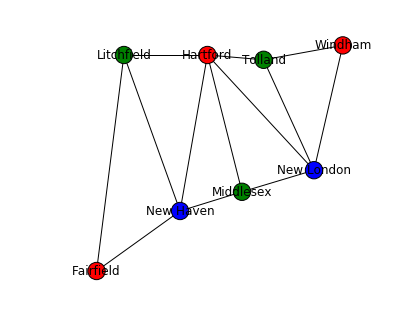

In [63]:
connecticut_colors = color_map( connecticut, ["red", "blue", "green"], trace=True)
if connecticut_colors:
    draw_map( connecticut, (5,4), connecticut_colors)

## Problem 2. Color Europe Using Your solution

In [64]:
europe = {
    "nodes":  ["Iceland", "Ireland", "United Kingdom", "Portugal", "Spain",
                 "France", "Belgium", "Netherlands", "Luxembourg", "Germany",
                 "Denmark", "Norway", "Sweden", "Finland", "Estonia",
                 "Latvia", "Lithuania", "Poland", "Czech Republic", "Austria",
                 "Liechtenstein", "Switzerland", "Italy", "Malta", "Greece",
                 "Albania", "Macedonia", "Kosovo", "Montenegro", "Bosnia Herzegovina",
                 "Serbia", "Croatia", "Slovenia", "Hungary", "Slovakia",
                 "Belarus", "Ukraine", "Moldova", "Romania", "Bulgaria",
                 "Cyprus", "Turkey", "Georgia", "Armenia", "Azerbaijan",
                 "Russia" ], 
    "edges": [(0,1), (0,2), (1,2), (2,5), (2,6), (2,7), (2,11), (3,4),
                 (4,5), (4,22), (5,6), (5,8), (5,9), (5,21), (5,22),(6,7),
                 (6,8), (6,9), (7,9), (8,9), (9,10), (9,12), (9,17), (9,18),
                 (9,19), (9,21), (10,11), (10,12), (10,17), (11,12), (11,13), (11,45), 
                 (12,13), (12,14), (12,15), (12,17), (13,14), (13,45), (14,15),
                 (14,45), (15,16), (15,35), (15,45), (16,17), (16,35), (17,18),
                 (17,34), (17,35), (17,36), (18,19), (18,34), (19,20), (19,21), 
                 (19,22), (19,32), (19,33), (19,34), (20,21), (21,22), (22,23),
                 (22,24), (22,25), (22,28), (22,29), (22,31), (22,32), (24,25),
                 (24,26), (24,39), (24,40), (24,41), (25,26), (25,27), (25,28),
                 (26,27), (26,30), (26,39), (27,28), (27,30), (28,29), (28,30),
                 (29,30), (29,31), (30,31), (30,33), (30,38), (30,39), (31,32),
                 (31,33), (32,33), (33,34), (33,36), (33,38), (34,36), (35,36),
                 (35,45), (36,37), (36,38), (36,45), (37,38), (38,39), (39,41),
                 (40,41), (41,42), (41,43), (41,44), (42,43), (42,44), (42,45),
                 (43,44), (44,45)],
    "coordinates": [( 18,147), ( 48, 83), ( 64, 90), ( 47, 28), ( 63, 34),
                   ( 78, 55), ( 82, 74), ( 84, 80), ( 82, 69), (100, 78),
                   ( 94, 97), (110,162), (116,144), (143,149), (140,111),
                   (137,102), (136, 95), (122, 78), (110, 67), (112, 60),
                   ( 98, 59), ( 93, 55), (102, 35), (108, 14), (130, 22),
                   (125, 32), (128, 37), (127, 40), (122, 42), (118, 47),
                   (127, 48), (116, 53), (111, 54), (122, 57), (124, 65),
                   (146, 87), (158, 65), (148, 57), (138, 54), (137, 41),
                   (160, 13), (168, 29), (189, 39), (194, 32), (202, 33),
                   (191,118)]}
print(europe)

{'edges': [(0, 1), (0, 2), (1, 2), (2, 5), (2, 6), (2, 7), (2, 11), (3, 4), (4, 5), (4, 22), (5, 6), (5, 8), (5, 9), (5, 21), (5, 22), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 10), (9, 12), (9, 17), (9, 18), (9, 19), (9, 21), (10, 11), (10, 12), (10, 17), (11, 12), (11, 13), (11, 45), (12, 13), (12, 14), (12, 15), (12, 17), (13, 14), (13, 45), (14, 15), (14, 45), (15, 16), (15, 35), (15, 45), (16, 17), (16, 35), (17, 18), (17, 34), (17, 35), (17, 36), (18, 19), (18, 34), (19, 20), (19, 21), (19, 22), (19, 32), (19, 33), (19, 34), (20, 21), (21, 22), (22, 23), (22, 24), (22, 25), (22, 28), (22, 29), (22, 31), (22, 32), (24, 25), (24, 26), (24, 39), (24, 40), (24, 41), (25, 26), (25, 27), (25, 28), (26, 27), (26, 30), (26, 39), (27, 28), (27, 30), (28, 29), (28, 30), (29, 30), (29, 31), (30, 31), (30, 33), (30, 38), (30, 39), (31, 32), (31, 33), (32, 33), (33, 34), (33, 36), (33, 38), (34, 36), (35, 36), (35, 45), (36, 37), (36, 38), (36, 45), (37, 38), (38, 39), (39, 41), (40, 41), (

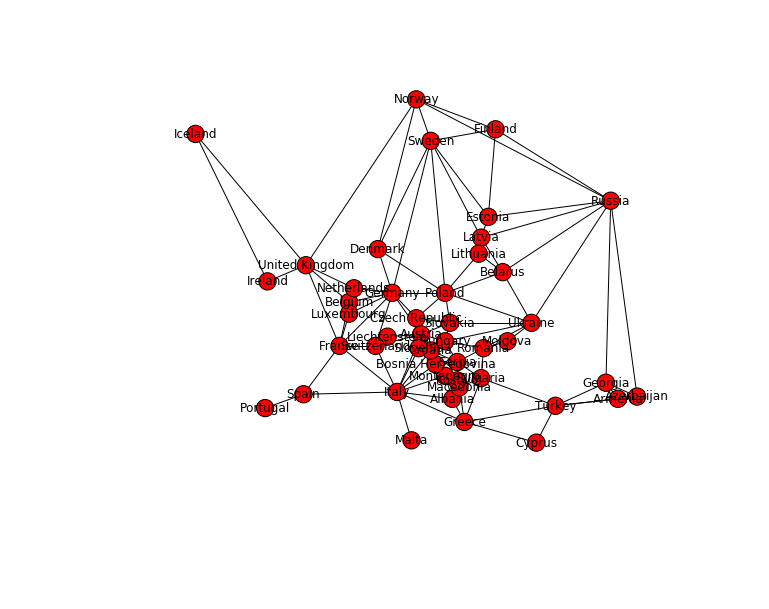

In [26]:
draw_map( europe, (10, 8))

In [65]:
europe_colors = color_map( europe, ["red", "blue", "green", "yellow"], trace=False)
print(europe_colors)

[('Iceland', 'blue'), ('Ireland', 'green'), ('United Kingdom', 'red'), ('Portugal', 'red'), ('Spain', 'green'), ('France', 'blue'), ('Belgium', 'green'), ('Netherlands', 'blue'), ('Luxembourg', 'yellow'), ('Germany', 'red'), ('Denmark', 'yellow'), ('Norway', 'blue'), ('Sweden', 'green'), ('Finland', 'yellow'), ('Estonia', 'blue'), ('Latvia', 'yellow'), ('Lithuania', 'red'), ('Poland', 'blue'), ('Czech Republic', 'green'), ('Austria', 'blue'), ('Liechtenstein', 'red'), ('Switzerland', 'green'), ('Italy', 'red'), ('Malta', 'blue'), ('Greece', 'blue'), ('Albania', 'green'), ('Macedonia', 'yellow'), ('Kosovo', 'blue'), ('Montenegro', 'yellow'), ('Bosnia Herzegovina', 'green'), ('Serbia', 'red'), ('Croatia', 'blue'), ('Slovenia', 'yellow'), ('Hungary', 'green'), ('Slovakia', 'red'), ('Belarus', 'green'), ('Ukraine', 'yellow'), ('Moldova', 'red'), ('Romania', 'blue'), ('Bulgaria', 'green'), ('Cyprus', 'green'), ('Turkey', 'red'), ('Georgia', 'blue'), ('Armenia', 'yellow'), ('Azerbaijan', 'gr

Here we're testing to see if the adjacent nodes are colored differently:

In [67]:
edges = europe["edges"]
nodes = europe[ "nodes"]
colors = europe_colors
COLOR = 1

for start, end in edges:
    try:
        assert colors[ start][COLOR] != colors[ end][COLOR]
    except AssertionError:
        print("%s and %s are adjacent but have the same color." % (nodes[ start], nodes[ end]))

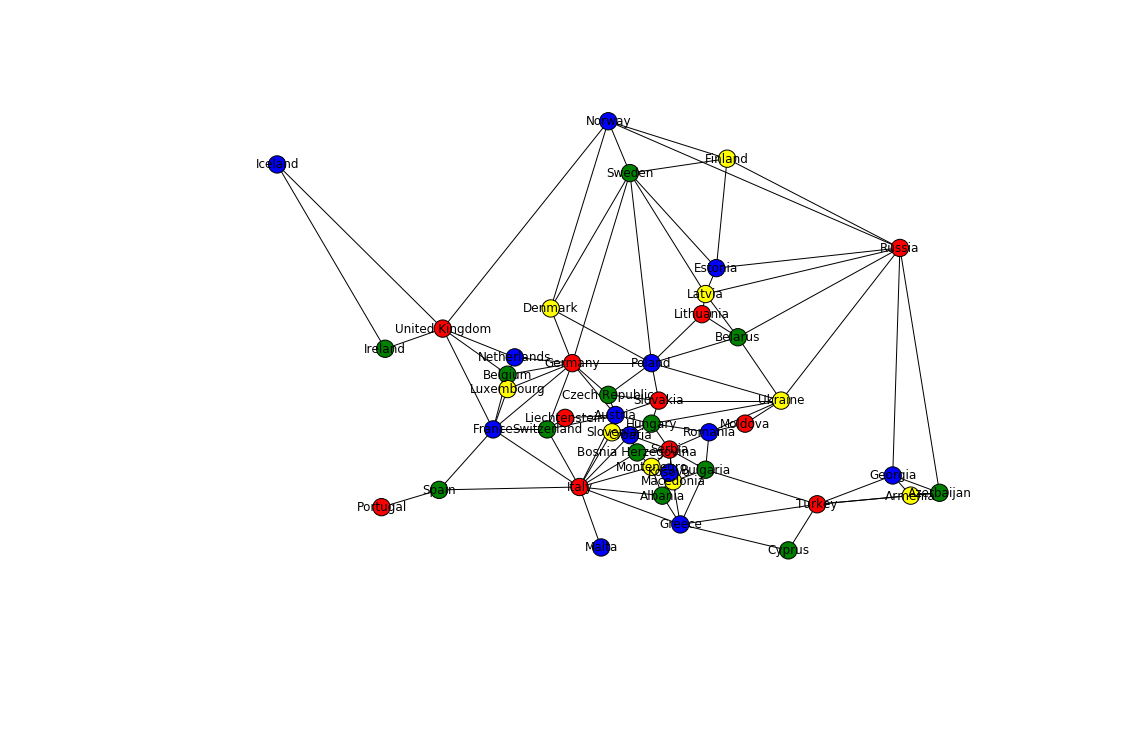

In [77]:
draw_map( europe, (15,10), europe_colors)

In [78]:
europe_colors = color_map( europe, ["red", "blue", "green"], trace=True)
if europe_colors:
     draw_map( europe, (15,10), europe_colors)

CSP starting point looks like: 
{'nodes': ['Iceland', 'Ireland', 'United Kingdom', 'Portugal', 'Spain', 'France', 'Belgium', 'Netherlands', 'Luxembourg', 'Germany', 'Denmark', 'Norway', 'Sweden', 'Finland', 'Estonia', 'Latvia', 'Lithuania', 'Poland', 'Czech Republic', 'Austria', 'Liechtenstein', 'Switzerland', 'Italy', 'Malta', 'Greece', 'Albania', 'Macedonia', 'Kosovo', 'Montenegro', 'Bosnia Herzegovina', 'Serbia', 'Croatia', 'Slovenia', 'Hungary', 'Slovakia', 'Belarus', 'Ukraine', 'Moldova', 'Romania', 'Bulgaria', 'Cyprus', 'Turkey', 'Georgia', 'Armenia', 'Azerbaijan', 'Russia'], 'coordinates': [(18, 147), (48, 83), (64, 90), (47, 28), (63, 34), (78, 55), (82, 74), (84, 80), (82, 69), (100, 78), (94, 97), (110, 162), (116, 144), (143, 149), (140, 111), (137, 102), (136, 95), (122, 78), (110, 67), (112, 60), (98, 59), (93, 55), (102, 35), (108, 14), (130, 22), (125, 32), (128, 37), (127, 40), (122, 42), (118, 47), (127, 48), (116, 53), (111, 54), (122, 57), (124, 65), (146, 87), (158,